### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [30]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [32]:
# Your code here
dataset = data.drop(columns=['StudentID','Age','Gender','Ethnicity'])

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [33]:
# Your code here
dataset.isnull().sum()

ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [34]:
# Your code here
X = dataset.drop(columns=['GPA'])
y = dataset['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape)

(1913, 10)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [35]:
# Your code here
model = Sequential()
model.add(Dense(64, input_dim = 10, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [36]:
# Your code here
model.compile(optimizer='Adam',loss='mse', metrics=['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [37]:
# Your code here
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)        


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3006 - mae: 0.8774 - val_loss: 0.1423 - val_mae: 0.3101
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.1084 - mae: 0.2684 - val_loss: 0.0836 - val_mae: 0.2361
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0671 - mae: 0.2091 - val_loss: 0.0606 - val_mae: 0.2033
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0538 - mae: 0.1895 - val_loss: 0.0544 - val_mae: 0.1884
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0423 - mae: 0.1650 - val_loss: 0.0494 - val_mae: 0.1801
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0397 - mae: 0.1597 - val_loss: 0.0479 - val_mae: 0.1813
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0365 - mae: 0.1545 - val_loss: 0.0445 - val_mae: 0.1718
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0334 - mae: 0.1461 - val_loss: 0.0463 - val_mae: 0.1747
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

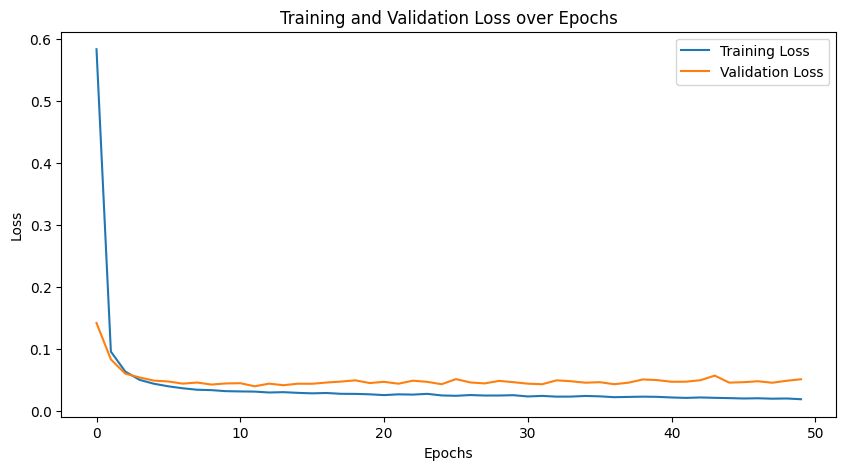

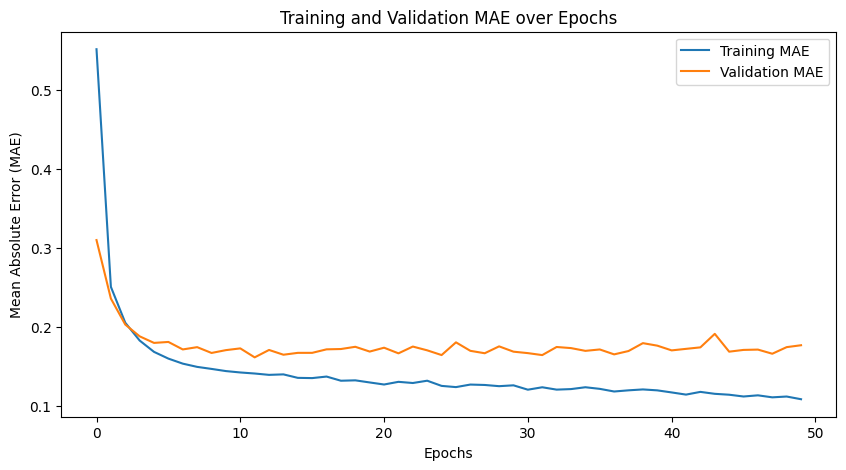

In [38]:
# Your code here
# Graficar la Pérdida (Loss)
plt.figure(figsize=(10, 5))

# Pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Etiquetas y título
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Mostrar gráfico
plt.show()

# Graficar MAE (Mean Absolute Error)
plt.figure(figsize=(10, 5))

# MAE de entrenamiento y validación
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

# Etiquetas y título
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()

# Mostrar gráfico
plt.show()


### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [39]:
# Your code here
# Evaluar el modelo en los datos de prueba
loss, mae = model.evaluate(X_test_scaled, y_test)

# Mostrar los resultados
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0497 - mae: 0.1718
Test Loss (MSE): 0.04908525198698044
Test MAE: 0.17145514488220215


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [40]:
# Your code here
# Hacer predicciones en X_test
predictions = model.predict(X_test_scaled)
# Imprimir las predicciones y los valores reales
for i in range(len(predictions)):
    print(f"Predicción: {predictions[i][0]:.4f}, Valor real: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicción: 1.4530, Valor real: 1.4277
Predicción: 2.7917, Valor real: 3.1174
Predicción: 2.1365, Valor real: 2.0378
Predicción: 3.5470, Valor real: 3.5485
Predicción: 0.4735, Valor real: 0.2490
Predicción: 2.8653, Valor real: 2.6277
Predicción: 1.8642, Valor real: 2.0574
Predicción: 2.1632, Valor real: 2.2483
Predicción: 2.3330, Valor real: 2.1947
Predicción: 0.9516, Valor real: 0.7582
Predicción: 2.6922, Valor real: 2.3709
Predicción: 0.7979, Valor real: 0.7664
Predicción: 3.0882, Valor real: 2.9527
Predicción: 2.7494, Valor real: 2.3433
Predicción: 2.7959, Valor real: 2.7718
Predicción: 0.3868, Valor real: 0.2879
Predicción: 1.1242, Valor real: 1.0183
Predicción: 1.5468, Valor real: 1.6294
Predicción: 2.0715, Valor real: 2.0744
Predicción: 2.5953, Valor real: 2.4238
Predicción: 2.2272, Valor real: 1.7562
Predicción: 1.6631, Valor real: 1.5663
Predicción: 1.8662, Valor real: 1.7062
Predicción: 3.3166, Valor real: 3.1614
Predicción: 1.7608, Valo

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [41]:
# Your code here
# Dataset Data Engineering
dataset2 = data.drop(columns=['Gender','Ethnicity','ParentalSupport','Music','StudentID'])
X2 = dataset2.drop(columns=['GPA'])
y2 = dataset2['GPA']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
print(X_train_scaled2.shape)

# Model Definition
model2 = Sequential()
model2.add(Dense(128, input_dim=9, activation='relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1))

# Model Compile
model2.compile(optimizer='Adam',loss='mse', metrics=['mae'])

# Model Training
history2 = model2.fit(X_train_scaled2, y_train2, epochs=50, batch_size=10, validation_split=0.2)        

# Evaluar el modelo en los datos de prueba
loss2, mae2 = model2.evaluate(X_test_scaled2, y_test2)

# Mostrar los resultados
print(f"Test Loss (MSE): {loss2}")
print(f"Test MAE: {mae2}")


(1913, 9)
Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0372 - mae: 0.7403 - val_loss: 0.1163 - val_mae: 0.2745
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0995 - mae: 0.2544 - val_loss: 0.0831 - val_mae: 0.2304
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.0782 - mae: 0.2256 - val_loss: 0.0738 - val_mae: 0.2198
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0641 - mae: 0.2032 - val_loss: 0.0686 - val_mae: 0.2163
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0608 - mae: 0.1971 - val_loss: 0.0717 - val_mae: 0.2142
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0602 - mae: 0.1939 - val_loss: 0.0625 - val_mae: 0.1972
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0609 - mae: 0.1935 - val_loss: 0.0651 - val_mae: 0.1987
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0520 - mae: 0.1789 - val_loss: 0.0616 - val_mae: 0.1936
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss:

### Cambios en el modelo 2
Se agregó una capa extra, se eliminaron columnas diferentes al modelo 1.


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [45]:
# Your code here
# Dataset Data Engineering
dataset3 = data.drop(columns=['Ethnicity','Sports','Volunteering','StudentID'])
X3 = dataset3.drop(columns=['GPA'])
y3 = dataset3['GPA']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)
print(X_train_scaled3.shape)

# Model Definition
model3 = Sequential()
model3.add(Dense(128, input_dim=10, activation='relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1))

# Model Compile
model3.compile(optimizer='RMSprop',loss='mse', metrics=['mae'])

# Model Training
history3 = model3.fit(X_train_scaled3, y_train3, epochs=50, batch_size=10, validation_split=0.2)        

# Evaluar el modelo en los datos de prueba
loss3, mae3 = model3.evaluate(X_test_scaled3, y_test3)

# Mostrar los resultados
print(f"Test Loss (MSE): {loss3}")
print(f"Test MAE: {mae3}")

(1913, 10)
Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6669 - mae: 0.5545 - val_loss: 0.0753 - val_mae: 0.2202
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0793 - mae: 0.2231 - val_loss: 0.0800 - val_mae: 0.2291
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0577 - mae: 0.1903 - val_loss: 0.0679 - val_mae: 0.2098
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0508 - mae: 0.1799 - val_loss: 0.0591 - val_mae: 0.1900
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0474 - mae: 0.1724 - val_loss: 0.0617 - val_mae: 0.1957
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0419 - mae: 0.1642 - val_loss: 0.0570 - val_mae: 0.1879
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 - mae: 0.1528 - val_loss: 0.0659 - val_mae: 0.2014
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0378 - mae: 0.1553 - val_loss: 0.0585 - val_mae: 0.1899
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0

### Cambios modelo 3
Se cambiaron las columnas que se quitaron y se cambio el optimizador por RMSprop

### Resultados

In [47]:
resultados = {
    'model':['model1', 'model2', 'model3'],
    'loss' : [loss, loss2, loss3],
    'mae' : [mae, mae2, mae3]
}
resultados = pd.DataFrame(resultados)
print(resultados)

    model      loss       mae
0  model1  0.049085  0.171455
1  model2  0.072209  0.209476
2  model3  0.067911  0.201143


### Predicciones

In [48]:
predictions = model.predict(X_test_scaled)
predictions2 = model2.predict(X_test_scaled2)
predictions3 = model3.predict(X_test_scaled3)

# Obtener las primeras 5 predicciones de cada modelo
preds_model1 = predictions[:5]
preds_model2 = predictions2[:5]
preds_model3 = predictions3[:5]
real_values = y_test.iloc[:5]

# Crear un DataFrame con las predicciones y los valores reales
tabla_predicciones = pd.DataFrame({
    'Predicción Modelo 1': preds_model1.flatten(),  # Aplanar si es un array bidimensional
    'Predicción Modelo 2': preds_model2.flatten(),
    'Predicción Modelo 3': preds_model3.flatten(),
    'Valor Real': real_values.values.flatten()
})

# Mostrar la tabla con las primeras 5 predicciones
print(tabla_predicciones)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   Predicción Modelo 1  Predicción Modelo 2  Predicción Modelo 3  Valor Real
0             1.452954             0.984362             1.603596    1.427724
1             2.791680             3.006937             3.204161    3.117354
2             2.136469             2.223779             2.204427    2.037769
3             3.546973             3.705250             3.478947    3.548521
4             0.473459             0.454353             0.331735    0.248977


Dados los resultados y las predicciones de los 3 modelos se puede observar que el mejor modelo es el primero debido a que tiene una perdida y un mae menor a los otros dos modelos. Ademas en las predicciones se puede ver que en la mayoria de los casos se acerca mas al valor real.